# Multi-Class Classification Model for Letter Recognition Using Python
### David Lowe
### August 27, 2018

Template Credit: Adapted from a template made available by Dr. Jason Brownlee of Machine Learning Mastery. https://machinelearningmastery.com/

SUMMARY: The purpose of this project is to construct a prediction model using various machine learning algorithms and to document the end-to-end steps using a template. The Letter Recognition Data Set is a multi-class classification situation where we are trying to predict one of the several possible outcomes.

INTRODUCTION: The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli. Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.

CONCLUSION: The baseline performance of the eight algorithms achieved an average accuracy of 80.98%. Three algorithms (k-Nearest Neighbors, Support Vector Machine, and Extra Trees) achieved the top three accuracy scores after the first round of modeling. After a series of tuning trials, Support Vector Machine turned in the top result using the training data. It achieved an average accuracy of 97.37%. Using the optimized tuning parameter available, the Support Vector Machine algorithm processed the validation dataset with an accuracy of 97.46%, which was even slightly better the accuracy of the training data.

For this project, the Support Vector Machine algorithm yielded consistently top-notch training and validation results, which warrant the additional processing required by the algorithm.

Dataset Used: Letter Recognition

Dataset ML Model: Multi-class classification with numerical attributes

Dataset Reference: https://archive.ics.uci.edu/ml/datasets/Letter+Recognition

One potential source of performance benchmarks: https://www.kaggle.com/c/ci-letter-recognition

The project aims to touch on the following areas:

* Document a predictive modeling problem end-to-end.
* Explore data cleaning and transformation options
* Explore non-ensemble and ensemble algorithms for baseline model performance
* Explore algorithm tuning techniques for improving model performance

Any predictive modeling machine learning project genrally can be broken down into about six major tasks:

1. Prepare Problem
2. Summarize Data
3. Prepare Data
4. Model and Evaluate Algorithms
5. Improve Accuracy or Results
6. Finalize Model and Present Results

## Section 1 - Prepare Problem

### 1.a) Load ibraries

In [1]:
import numpy as np
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

### 1.b) Load dataset

In [2]:
startTimeScript = datetime.now()

inputFile = 'letter-recognition.data'
colnames = ['targetVar','x_box','y_box','width','high','onpix','x_bar','y_bar','x2bar','y2bar','xybar','x2ybr','xy2br','x_ege','xegvy','y_ege','yegvx']
entireDataset = read_csv(inputFile, names=colnames)

# Standardize the class column to the name of targetVar
#entireDataset = entireDataset.rename(columns={'Type': 'targetVar'})

## Section 2 - Summarize Data
To gain a better understanding of the data that we have on-hand, we will leverage a number of descriptive statistics and data visualization techniques. The plan is to use the results to consider new questions, review assumptions, and validate hypotheses that we can investigate later with specialized models.

### 2.a) Descriptive statistics

In [3]:
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(entireDataset.columns)
totAttr = totCol-1
# Set up the number of row and columns for visualization display. dispRow * dispCol should be >= totAttr
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1

#### 2.a.i) Peek at the data itself.

In [4]:
print(entireDataset.head(20))

   targetVar  x_box  y_box  width  high  onpix  x_bar  y_bar  x2bar  y2bar  \
0          T      2      8      3     5      1      8     13      0      6   
1          I      5     12      3     7      2     10      5      5      4   
2          D      4     11      6     8      6     10      6      2      6   
3          N      7     11      6     6      3      5      9      4      6   
4          G      2      1      3     1      1      8      6      6      6   
5          S      4     11      5     8      3      8      8      6      9   
6          B      4      2      5     4      4      8      7      6      6   
7          A      1      1      3     2      1      8      2      2      2   
8          J      2      2      4     4      2     10      6      2      6   
9          M     11     15     13     9      7     13      2      6      2   
10         X      3      9      5     7      4      8      7      3      8   
11         O      6     13      4     7      4      6      7    

#### 2.a.ii) Dimensions of the dataset.

In [5]:
print(entireDataset.shape)

(20000, 17)


#### 2.a.iii) Types of the attributes.

In [6]:
print(entireDataset.dtypes)

targetVar    object
x_box         int64
y_box         int64
width         int64
high          int64
onpix         int64
x_bar         int64
y_bar         int64
x2bar         int64
y2bar         int64
xybar         int64
x2ybr         int64
xy2br         int64
x_ege         int64
xegvy         int64
y_ege         int64
yegvx         int64
dtype: object


#### 2.a.iv) Statistical summary of all attributes.

In [7]:
print(entireDataset.describe())

              x_box         y_box         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

              x_bar         y_bar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

#### 2.a.v) Summarize the levels of the class attribute.

In [8]:
print(entireDataset.groupby('targetVar').size())

targetVar
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
dtype: int64


#### 2.a.v) Count missing values.

In [9]:
print(entireDataset.isnull().sum())

targetVar    0
x_box        0
y_box        0
width        0
high         0
onpix        0
x_bar        0
y_bar        0
x2bar        0
y2bar        0
xybar        0
x2ybr        0
xy2br        0
x_ege        0
xegvy        0
y_ege        0
yegvx        0
dtype: int64


### 2.b) Data visualizations

##### 2.b.i) Univariate plots to better understand each attribute

In [10]:
attributeOnly = entireDataset.drop(columns=['targetVar'])

In [11]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size

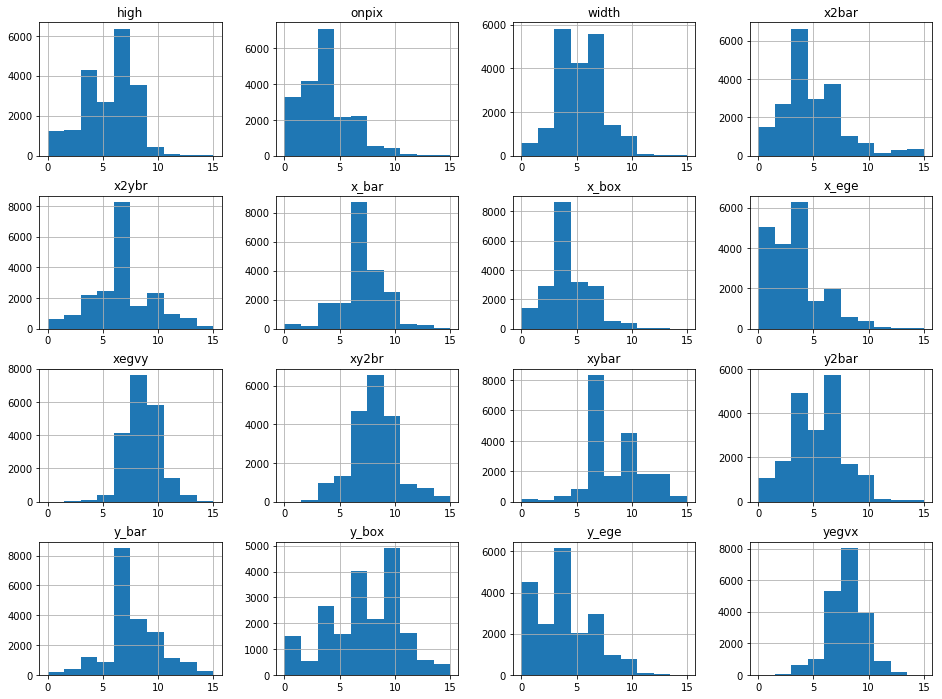

In [12]:
# Histograms for each attribute
attributeOnly.hist()
pyplot.show()

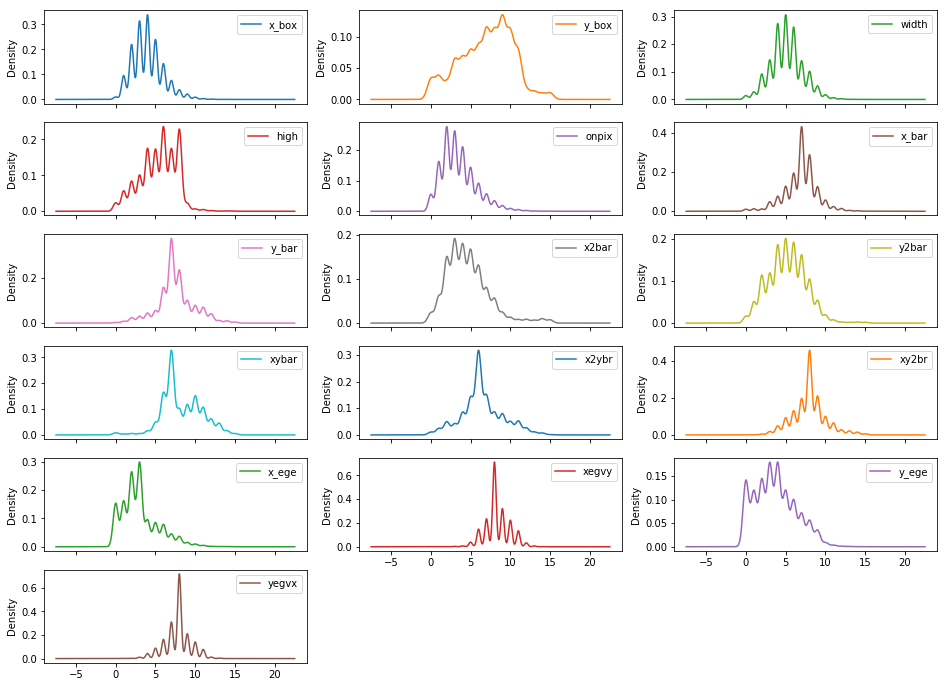

In [13]:
# Density plot for each attribute
attributeOnly.plot(kind='density', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

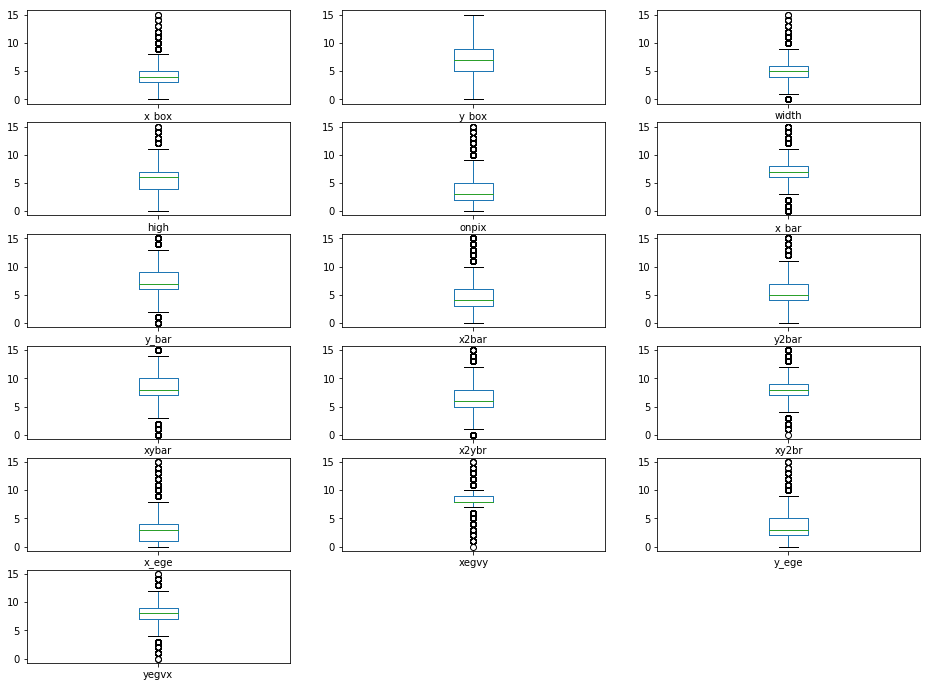

In [14]:
# Box and Whisker plot for each attribute
attributeOnly.plot(kind='box', subplots=True, layout=(dispRow,dispCol))
pyplot.show()

#### 2.b.ii) Multivariate plots to better understand the relationships between attributes

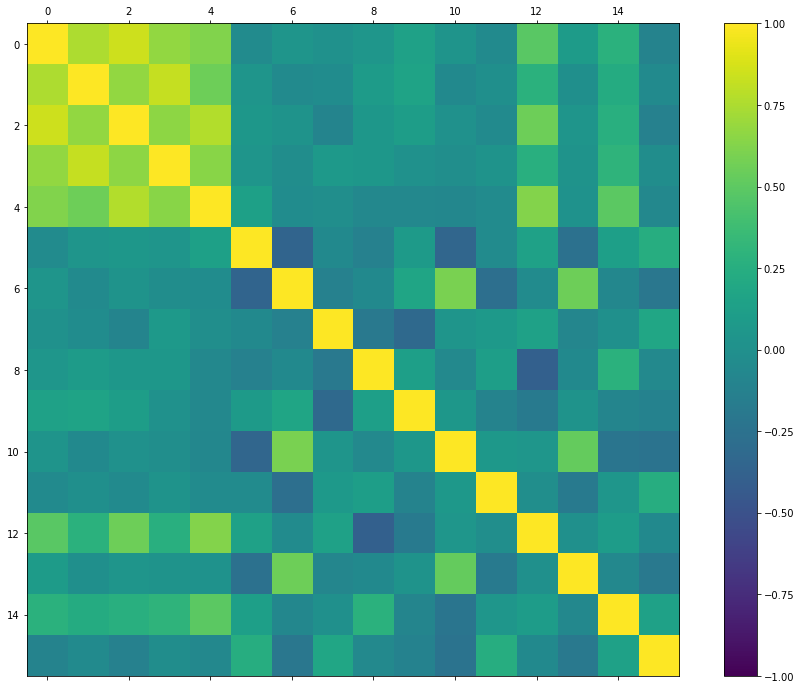

In [15]:
# Correlation matrix
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(entireDataset.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

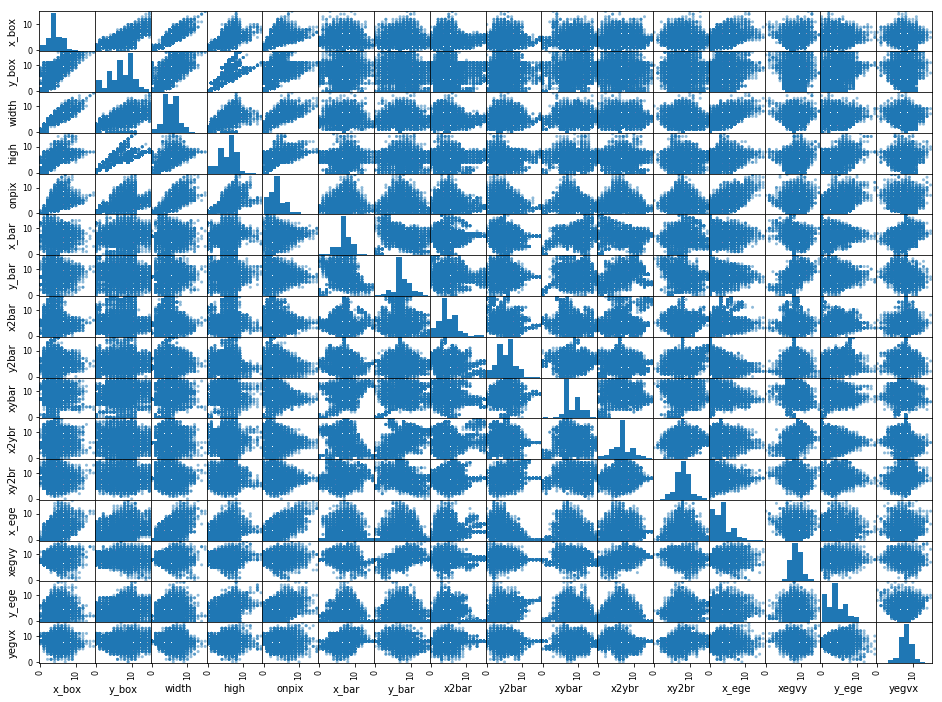

In [16]:
# Scatterplot matrix
scatter_matrix(attributeOnly)
pyplot.show()

## Section 3 - Prepare Data
Some dataset may require additional preparation activities that will best exposes the structure of the problem and the relationships between the input attributes and the output variable. Some data-prep tasks might include:

* Cleaning data by removing duplicates, marking missing values and even imputing missing values.
* Feature selection where redundant features may be removed.
* Data transforms where attributes are scaled or redistributed in order to best expose the structure of the problem later to learning algorithms.

### 3.a) Data Cleaning

In [17]:
# Not applicable for this iteration of the project.

### 3.b) Feature Selection

In [18]:
# Not applicable for this iteration of the project.

### 3.c) Data Transforms

In [19]:
# Not applicable for this iteration of the project.

### 3.d) Split-out training and validation datasets
We create a training dataset (variable name "training") and a validation dataset (variable name "validation").

In [20]:
seedNum = 888
totAttr = len(entireDataset.columns)-1

# attrColOffSet equals to 0 if the targetVar column is the last column
# attrColOffSet equals to 1 if the targetVar column is the first column
attrColOffSet = 1

array = entireDataset.values
X_entire = array[:,attrColOffSet:(totAttr+attrColOffSet)]
Y_entire = entireDataset['targetVar'].values
validation_size = 0.30
X_train, X_validation, Y_train, Y_validation = train_test_split(X_entire, Y_entire, test_size=validation_size, random_state=seedNum)
print("X_entire.shape: {} Y_entire.shape: {}".format(X_entire.shape, Y_entire.shape))
print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_validation.shape: {} Y_validation.shape: {}".format(X_validation.shape, Y_validation.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))

X_entire.shape: (20000, 16) Y_entire.shape: (20000,)
X_train.shape: (14000, 16) Y_train.shape: (14000,)
X_validation.shape: (6000, 16) Y_validation.shape: (6000,)
Total time for data handling and visualization: 0:02:34.537631


## 4. Model and Evaluate Algorithms
After the data-prep, we next work on finding a workable model by evaluating a subset of machine learning algorithms that are good at exploiting the structure of the training. The typical evaluation tasks include:

* Defining test options such as cross validation and the evaluation metric to use.
* Spot checking a suite of linear and nonlinear machine learning algorithms.
* Comparing the estimated accuracy of algorithms.

For this project, we will evaluate one linear, four non-linear and five ensemble algorithms:

Linear Algorithm: Linear Discriminant Analysis

Non-Linear Algorithms: Decision Trees (CART), Naive Bayes, k-Nearest Neighbors, and Support Vector Machine

Ensemble Algorithms: Bagged Decision Trees, Random Forest, Extra Trees, AdaBoost, and Stochastic Gradient Boosting

The random number seed is reset before each run to ensure that the evaluation of each algorithm is performed using the same data splits. It ensures the results are directly comparable.

### 4.a) Set test options and evaluation metric

In [21]:
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

In [22]:
# Set up Algorithms Spot-Checking Array
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(random_state=seedNum)))
models.append(('BDT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('GBM', GradientBoostingClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [23]:
# Generate model in turn
for name, model in models:
	startTimeModule = datetime.now()
	kfold = KFold(n_splits=num_folds, random_state=seedNum)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	metrics.append(cv_results.mean())
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\david.lowe\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.703214 (0.008171)
Model training time: 0:00:01.031934
CART: 0.857857 (0.009373)
Model training time: 0:00:01.123633
NB: 0.646714 (0.011131)
Model training time: 0:00:00.572702
KNN: 0.944643 (0.008032)
Model training time: 0:00:02.858943
SVM: 0.968929 (0.005242)
Model training time: 0:01:28.657460
BDT: 0.917214 (0.010063)
Model training time: 0:00:06.239432
RF: 0.926929 (0.008188)
Model training time: 0:00:02.602505
ET: 0.932429 (0.006725)
Model training time: 0:00:02.821383
AB: 0.289000 (0.033645)
Model training time: 0:00:29.189379
GBM: 0.911571 (0.007639)
Model training time: 0:09:46.414238
Average metrics (accuracy) from all models: 0.80985


### 4.b) Spot-checking baseline algorithms

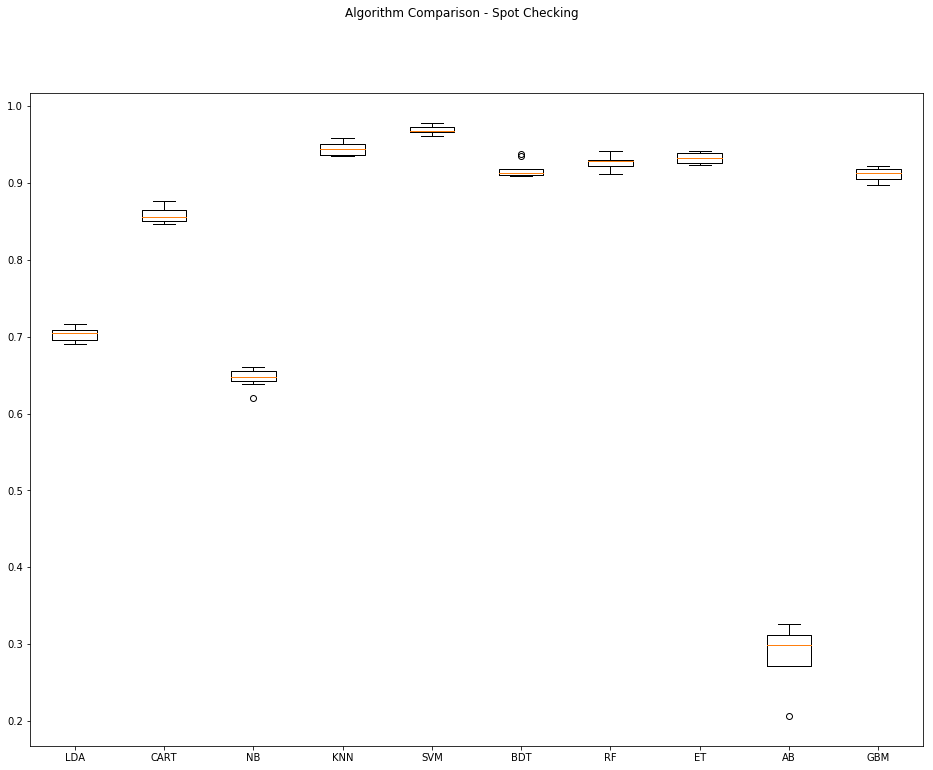

In [24]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 5 - Improve Accuracy
After we achieve a short list of machine learning algorithms with good level of accuracy, we can leverage ways to improve the accuracy of the models.

### 5.a) Algorithm Tuning

In [25]:
# Set up the comparison array
results = []
names = []

In [26]:
# Tuning algorithm #1 - k-Nearest Neighbors
startTimeModule = datetime.now()
paramGrid1 = dict(n_neighbors=np.array([3,5,7,9]))
model1 = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)
grid_result1 = grid1.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
results.append(grid_result1.cv_results_['mean_test_score'])
names.append('KNN')
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.944643 using {'n_neighbors': 5}
0.944214 (0.004912) with: {'n_neighbors': 3}
0.944643 (0.008032) with: {'n_neighbors': 5}
0.940143 (0.006982) with: {'n_neighbors': 7}
0.937714 (0.006760) with: {'n_neighbors': 9}
Model training time: 0:01:36.329636


In [27]:
# Tuning algorithm #2 - Support Vector Machine
startTimeModule = datetime.now()
paramGrid2 = dict(C=np.array([1,5,10,25,50]))
model2 = SVC(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)
grid_result2 = grid2.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))
results.append(grid_result2.cv_results_['mean_test_score'])
names.append('SVM')
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.973714 using {'C': 25}
0.968929 (0.005242) with: {'C': 1}
0.973643 (0.004374) with: {'C': 5}
0.973643 (0.004195) with: {'C': 10}
0.973714 (0.004235) with: {'C': 25}
0.973714 (0.004235) with: {'C': 50}
Model training time: 0:13:17.303105


In [28]:
# Tuning algorithm #3 - Extra Trees
startTimeModule = datetime.now()
paramGrid3 = dict(n_estimators=np.array([10,50,100,150,200]))
model3 = ExtraTreesClassifier(random_state=seedNum)
kfold = KFold(n_splits=num_folds, random_state=seedNum)
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)
grid_result3 = grid3.fit(X_train, Y_train)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))
results.append(grid_result3.cv_results_['mean_test_score'])
names.append('ET')
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print ('Model training time:',(datetime.now() - startTimeModule))

Best: 0.967571 using {'n_estimators': 150}
0.932429 (0.006725) with: {'n_estimators': 10}
0.962857 (0.006044) with: {'n_estimators': 50}
0.966786 (0.005970) with: {'n_estimators': 100}
0.967571 (0.005479) with: {'n_estimators': 150}
0.967500 (0.005840) with: {'n_estimators': 200}
Model training time: 0:02:19.556247


### 5.b) Compare Algorithms After Tuning

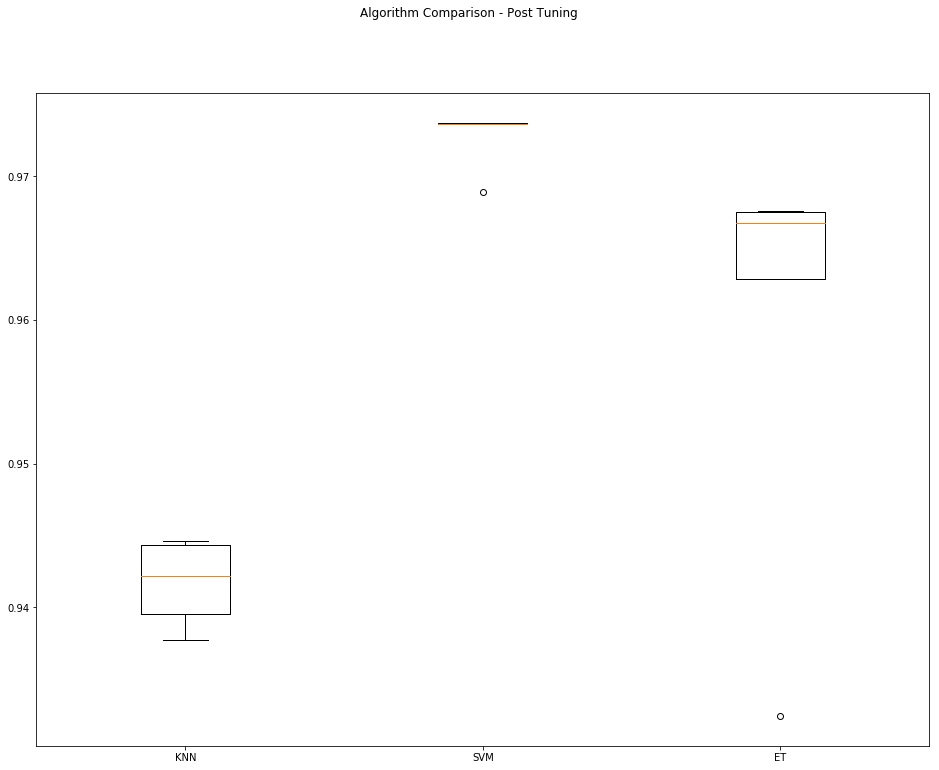

In [29]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Post Tuning')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Section 6 - Finalize Model
Once we have narrow down to a model that we believe can make accurate predictions on unseen data, we are ready to finalize it. Finalizing a model may involve sub-tasks such as:
* Using an optimal model tuned to make predictions on unseen data.
* Creating a standalone model using the tuned parameters
* Saving an optimal model to file for later use.

### 6.a) Predictions on validation dataset

In [30]:
model = SVC(C=25, random_state=seedNum)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9746666666666667
[[253   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0 211   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   1
    2   0   0   1   0   0   0   0]
 [  0   0 191   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   1   0 244   0   0   0   3   0   0   0   0   0   1   1   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   0   0   0 225   0   4   0   0   0   0   1   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   0   0   1   0 223   0   0   1   0   0   0   0   0   0   3   0   0
    0   2   0   0   0   1   0   0]
 [  0   0   0   0   1   0 224   0   0   0   0   0   1   0   0   0   0   0
    2   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0   0 195   0   1   3   0   0   0   1   0   0   9
    0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 227   7   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]


### 6.b) Create standalone model on entire training dataset

In [31]:
startTimeModule = datetime.now()
finalModel = SVC(C=25)
finalModel.fit(X_entire, Y_entire)
print ('Model training time:',(datetime.now() - startTimeModule))

Model training time: 0:00:17.262483


### 6.c) Save model for later use

In [32]:
# modelName = 'finalModel_BinaryClass.sav'
# dump(finalModel, modelName)

print ('Total time for the script:',(datetime.now() - startTimeScript))

Total time for the script: 0:32:22.969910
